# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Load The Dataset

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/Telco_Customer_Churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df.drop(columns=['customerID'])

In [5]:
# change the datatype of TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.shape

(7043, 20)

# Missinig Values Handling

In [8]:
df.dropna(how='any', inplace=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7032, 20)

# Handling Outliers

### distribution plots

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [11]:
categorical_columns = [
                       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
                        ]

numerical_columns = [
                    'tenure', 'MonthlyCharges', 'TotalCharges'
                    ]

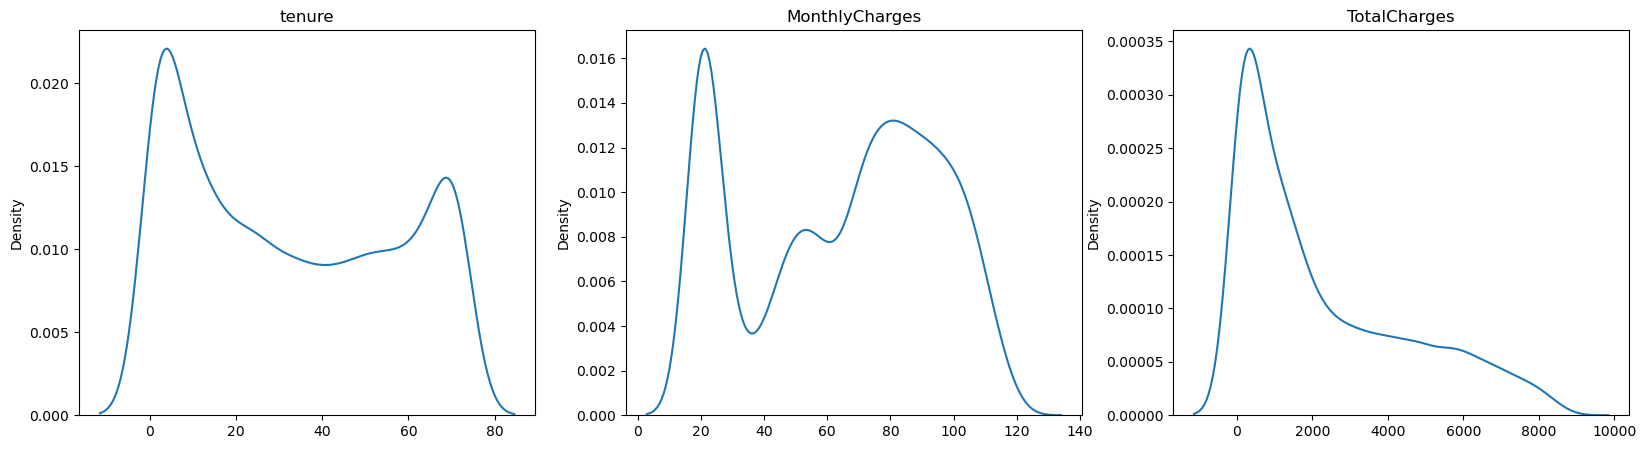

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
                data=df[col],
                ax=axes[idx]
                )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

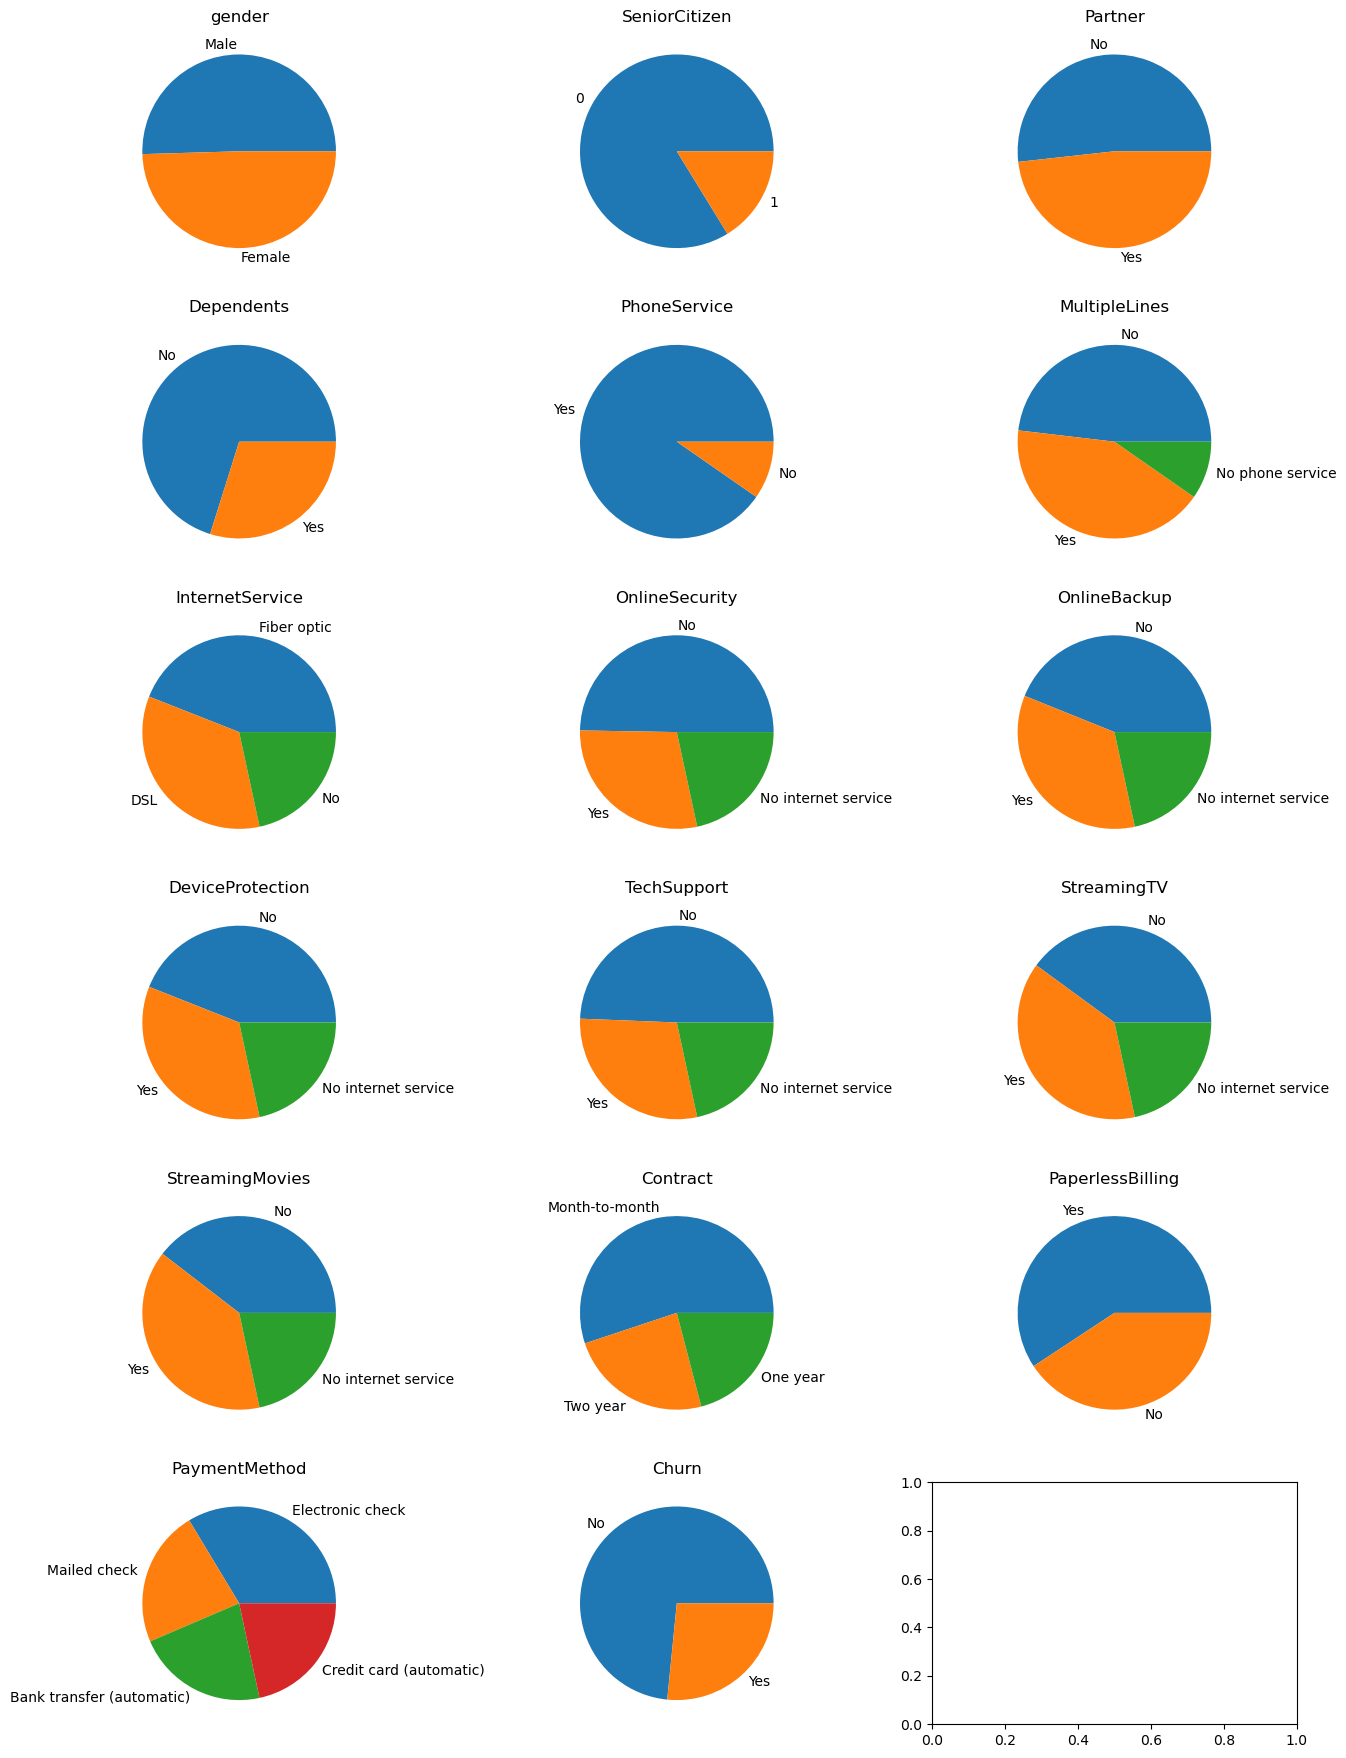

In [13]:
fig, axes = plt.subplots(6, 3, figsize=(16, 22))
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                                kind='pie',
                                ax=axes[idx]
                                )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.show()

### Box Plots

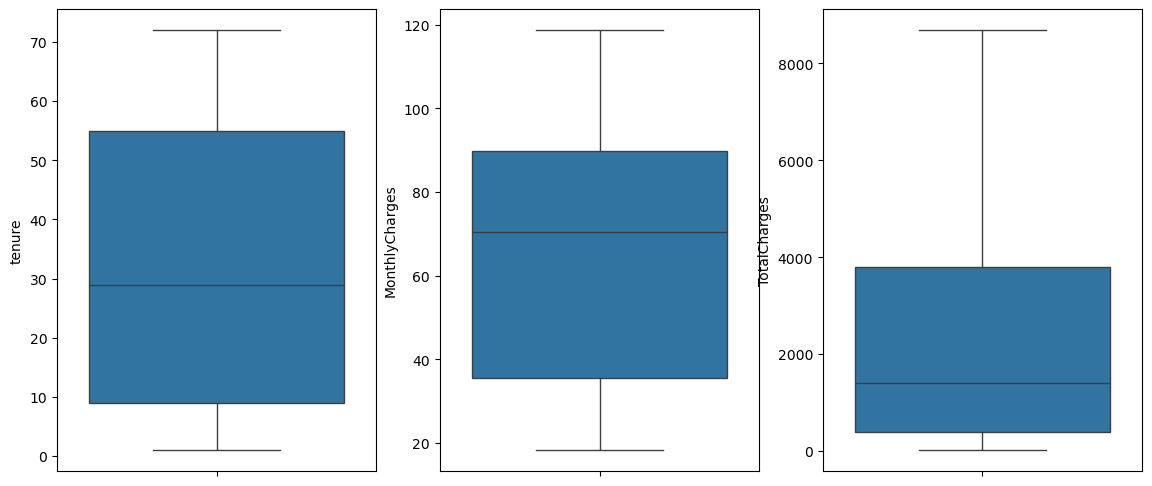

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])

plt.show()

### Z-Score
 
  Z = (xi − μ) / σ <br>
  If the absolute Z-score of a data point is greater than a threshold (usually 3), consider it an outlier.
​
 


In [15]:
from scipy.stats import zscore

z_scores = df[numerical_columns].apply(zscore)

outliers = df.loc[(np.abs(z_scores) > 3).any(axis=1), numerical_columns]
print(f"Outliers based on Z-Score: {outliers.shape[0]} rows\n")
print(outliers)

Outliers based on Z-Score: 0 rows

Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []


### IQR Method

In [16]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1 

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR 

    return (data > upper_bound) | (data < lower_bound)

In [17]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


In [18]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]
outlier_mask_log

,tenure,MonthlyCharges,TotalCharges,Outlier Count


# Feature Engineering

### Tenure Binning

In [19]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [20]:
def custom_binning_tenure(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 48:
        return 'Established'
    elif tenure <= 90:
        return 'Loyal'
    elif tenure <= 600:
        return 'Very Loyal'
    else:
        raise ValueError("Tenure can't be more than 600 months")

df['tenure'] = df['tenure'].apply(custom_binning_tenure)

print(df[['tenure']].head(10))

        tenure
0          New
1  Established
2          New
3  Established
4          New
5          New
6  Established
7          New
8  Established
9        Loyal


### Service Adoption Score

In [21]:
df['HasInternetService'] = df['InternetService'].apply(lambda x: 1 if x != 'No' else 0)

# Example service columns (adjust for your dataset)
service_cols = ['PhoneService', 'MultipleLines', 'HasInternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert Yes/No to 1/0
df[service_cols] = df[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})
df[service_cols] = df[service_cols].astype(int)

# Sum up to get Service Adoption Score
df['ServiceAdoptionScore'] = df[service_cols].sum(axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8\1087947724.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service_cols] = df[service_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})


### Average Monthly Charges per Service

In [22]:
df['AvgMonthlyChargesPerService'] = df.apply(
    lambda row: row['MonthlyCharges'] / row['ServiceAdoptionScore'] 
    if row['ServiceAdoptionScore'] > 0 else 0, axis=1
)

### Payment Reliability Indicators

In [23]:
df['PaymentReliability'] = df['PaymentMethod'].apply(
    lambda x: 'High' if 'automatic' in x.lower() else 'Low'
)

In [24]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService,ServiceAdoptionScore,AvgMonthlyChargesPerService,PaymentReliability
0,Female,0,Yes,No,New,0,0,DSL,0,1,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,2,14.925000,Low
1,Male,0,No,No,Established,1,0,DSL,1,0,...,One year,No,Mailed check,56.95,1889.50,No,1,4,14.237500,Low
2,Male,0,No,No,New,1,0,DSL,1,1,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,4,13.462500,Low
3,Male,0,No,No,Established,0,0,DSL,1,0,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,4,10.575000,High
4,Female,0,No,No,New,1,0,Fiber optic,0,0,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,2,35.350000,Low
5,Female,0,No,No,New,1,1,Fiber optic,0,0,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,6,16.608333,Low
6,Male,0,No,Yes,Established,1,1,Fiber optic,0,1,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1,5,17.820000,High
7,Female,0,No,No,New,0,0,DSL,1,0,...,Month-to-month,No,Mailed check,29.75,301.90,No,1,2,14.875000,Low
8,Female,0,Yes,No,Established,1,1,Fiber optic,0,0,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,7,14.971429,Low
9,Male,0,No,Yes,Loyal,1,0,DSL,1,1,...,One year,No,Bank transfer (automatic),56.15,3487.95,No,1,4,14.037500,High


# Feature Encoding and Scaling Pipeline

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7032 non-null   object 
 1   SeniorCitizen                7032 non-null   int64  
 2   Partner                      7032 non-null   object 
 3   Dependents                   7032 non-null   object 
 4   tenure                       7032 non-null   object 
 5   PhoneService                 7032 non-null   int32  
 6   MultipleLines                7032 non-null   int32  
 7   InternetService              7032 non-null   object 
 8   OnlineSecurity               7032 non-null   int32  
 9   OnlineBackup                 7032 non-null   int32  
 10  DeviceProtection             7032 non-null   int32  
 11  TechSupport                  7032 non-null   int32  
 12  StreamingTV                  7032 non-null   int32  
 13  StreamingMovies        

In [26]:
numerical_features = [

    'MonthlyCharges',
    'TotalCharges',
    'AvgMonthlyChargesPerService'
]

nominal_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'PaymentMethod',
    'HasInternetService'
]

ordinal_features = [
    'tenure',
    'Contract',
    'ServiceAdoptionScore',
    'PaymentReliability'
]

remainder_features = [
    'Churn'
]

In [27]:
numerical_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())
                                ]
                                )

norminal_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(
                                                            strategy='constant',
                                                            fill_value='missing'
                                                            )),
                                    ('encoder', OneHotEncoder())
                                ]
                                )

ordinal_categories = [
    ['New', 'Established', 'Loyal'],             # tenure
    ['Month-to-month', 'One year', 'Two year'],  # Contract
    [1, 2, 3, 4, 5, 6, 7, 8, 9],                 # ServiceAdoptionScore
    ['Low', 'High']                              # PaymentReliability
]

ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OrdinalEncoder(categories=ordinal_categories, 
                                  handle_unknown='use_encoded_value', 
                                  unknown_value=-1))
    ]
)

preprocessor = ColumnTransformer(
                                transformers=[
                                            ('num', numerical_transformer, numerical_features),
                                            ('nom', norminal_transformer, nominal_features),
                                            ('ord', ordinal_transformer, ordinal_features)
                                ],
                                remainder='drop'
                                )

norminal_feature_names = []
for feature in nominal_features:
    unique_values = df[feature].unique()
    norminal_feature_names.extend([f"{feature}_{val}" for val in unique_values])

df_cp = df.copy()
df_transformed = pd.DataFrame(
                            preprocessor.fit_transform(df_cp),
                            columns=numerical_features+norminal_feature_names+ordinal_features,
                            index=df_cp.index 
                            )

df_remainder = df[remainder_features].copy()
df_remainder['Churn'] = df_remainder['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df_pp = pd.concat(
                [df_transformed, df_remainder], 
                axis=1
                )

df_pp.head(10)

,MonthlyCharges,TotalCharges,AvgMonthlyChargesPerService,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_Yes,Partner_No,Dependents_No,...,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),HasInternetService_1,HasInternetService_0,tenure,Contract,ServiceAdoptionScore,PaymentReliability,Churn
0,-1.161694,-0.994194,-0.440073,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,-0.260878,-0.173740,-0.568016,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,0
2,-0.363923,-0.959649,-0.712242,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1
3,-0.747850,-0.195248,-1.249601,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0
4,0.196178,-0.940457,3.360987,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
5,1.158489,-0.645369,-0.126807,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,1
6,0.807802,-0.147313,0.098682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0
7,-1.165018,-0.874169,-0.449378,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
8,1.329677,0.336516,-0.431433,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,1
9,-0.287470,0.531476,-0.605235,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0


In [28]:
df_pp.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
InternetService_Fiber optic                0.307463
PaymentMethod_Bank transfer (automatic)    0.301455
AvgMonthlyChargesPerService                0.291451
HasInternetService_0                       0.227578
MonthlyCharges                             0.192858
PaperlessBilling_No                        0.191454
OnlineSecurity_0                           0.171270
TechSupport_0                              0.164716
Dependents_No                              0.163128
SeniorCitizen_1                            0.150541
Partner_Yes                                0.149982
OnlineBackup_1                             0.082307
DeviceProtection_0                         0.066193
StreamingTV_1                              0.063254
StreamingMovies_1                          0.060860
MultipleLines_1                            0.040033
PhoneService_1                             0.011691
gender_Female                              0.008545
gender_Male 

In [29]:
df_pp.to_csv('../data/processed/Telco_Customer_Churn_Transformed.csv', index=False)

## Step: Remove Perfectly Correlated or Redundant Features

From correlation analysis, the following columns are redundant due to:
- **Perfect inverse correlation** (dummy `_0` vs `_1`)
- **One-hot encoding with all categories** (drop one to avoid dummy trap)

Can remove:

- `gender_Male`
- `SeniorCitizen_0`
- `Partner_No`
- `Dependents_No`
- `PhoneService_0`
- `MultipleLines_0`
- `InternetService_No`  *(keep Fiber optic & DSL)*
- `OnlineSecurity_0`
- `OnlineBackup_0`
- `DeviceProtection_0`
- `TechSupport_0`
- `StreamingTV_0`
- `StreamingMovies_0`
- `PaperlessBilling_No`
- One Payment Method dummy (`PaymentMethod_Credit card (automatic)` dropped here)
- `HasInternetService_0`

Also can drop low-correlation features (`gender_Female`, `PhoneService_1`, `ServiceAdoptionScore`)

In [30]:
cols_to_drop_redundant = [
    "gender_Male",
    "SeniorCitizen_0",
    "Partner_No",
    "Dependents_No",
    "PhoneService_0",
    "MultipleLines_0",
    "InternetService_No",   # Keep Fiber optic & DSL
    "OnlineSecurity_0",
    "OnlineBackup_0",
    "DeviceProtection_0",
    "TechSupport_0",
    "StreamingTV_0",
    "StreamingMovies_0",
    "PaperlessBilling_No",
    "PaymentMethod_Credit card (automatic)",  # Keep the other 3
    "HasInternetService_0"
]

cols_to_drop_low_correlation = [
    "gender_Female",
    "PhoneService_1",
    "ServiceAdoptionScore"
]

df_pp = df_pp.drop(columns=cols_to_drop_redundant + cols_to_drop_low_correlation)
print(f"Removed {len(cols_to_drop_redundant)} redundant columns and {len(cols_to_drop_low_correlation)} low correlation columns")


Removed 16 redundant columns and 3 low correlation columns


In [31]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   AvgMonthlyChargesPerService              7032 non-null   float64
 3   SeniorCitizen_1                          7032 non-null   float64
 4   Partner_Yes                              7032 non-null   float64
 5   Dependents_Yes                           7032 non-null   float64
 6   MultipleLines_1                          7032 non-null   float64
 7   InternetService_DSL                      7032 non-null   float64
 8   InternetService_Fiber optic              7032 non-null   float64
 9   OnlineSecurity_1                         7032 non-null   float64
 10  OnlineBackup_1                           7032 non-nul

In [32]:
df_pp.head()

,MonthlyCharges,TotalCharges,AvgMonthlyChargesPerService,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_1,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_1,...,StreamingMovies_1,PaperlessBilling_Yes,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),HasInternetService_1,tenure,Contract,PaymentReliability,Churn
0,-1.161694,-0.994194,-0.440073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.260878,-0.173740,-0.568016,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,-0.363923,-0.959649,-0.712242,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.747850,-0.195248,-1.249601,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,0.196178,-0.940457,3.360987,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [33]:
df_pp.to_csv('../data/processed/Telco_Customer_Churn_Transformed_Feature_Selected.csv', index=False)

In [43]:
df_pp.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
InternetService_Fiber optic                0.307463
PaymentMethod_Bank transfer (automatic)    0.301455
AvgMonthlyChargesPerService                0.291451
MonthlyCharges                             0.192858
SeniorCitizen_1                            0.150541
Partner_Yes                                0.149982
OnlineBackup_1                             0.082307
StreamingTV_1                              0.063254
StreamingMovies_1                          0.060860
MultipleLines_1                            0.040033
DeviceProtection_1                        -0.066193
PaymentMethod_Electronic check            -0.118136
InternetService_DSL                       -0.124141
PaymentMethod_Mailed check                -0.134687
Dependents_Yes                            -0.163128
TechSupport_1                             -0.164716
OnlineSecurity_1                          -0.171270
PaperlessBilling_Yes                      -0.191454
TotalCharges

# Handle Class Imbalance

In [34]:
df_pp.head()

,MonthlyCharges,TotalCharges,AvgMonthlyChargesPerService,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_1,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_1,...,StreamingMovies_1,PaperlessBilling_Yes,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),HasInternetService_1,tenure,Contract,PaymentReliability,Churn
0,-1.161694,-0.994194,-0.440073,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.260878,-0.173740,-0.568016,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,-0.363923,-0.959649,-0.712242,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.747850,-0.195248,-1.249601,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,0.196178,-0.940457,3.360987,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [35]:
X = df_pp.drop(columns=['Churn'])
Y = df_pp['Churn']

In [36]:
df_pp['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [37]:
"""
churn - 1869
non-churn - 5163

upsample - (churn) 1869 -> 5163
downsampling - (non-churn) 5163 -> 1869
"""

X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [38]:
"""
churn - 1869
non-churn - 5163

upsample - (churn) 1869 -> 5163
downsampling - (non-churn) 5163 -> 1869
"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

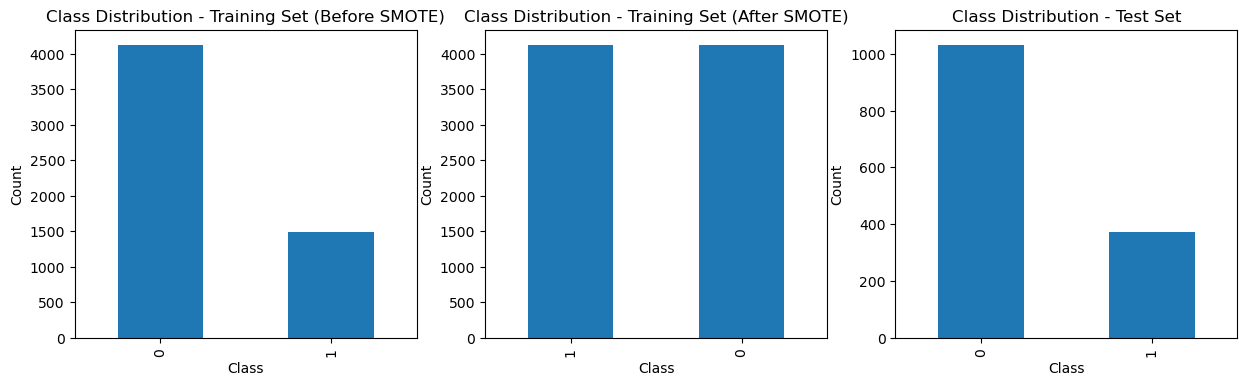

In [40]:
plt.figure(figsize=(15, 4))

# Before SMOTE
plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Test Set
plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

In [41]:
np.savez('../artifacts/balance/X_train.npz', X_train_resampled)
np.savez('../artifacts/balance/Y_train.npz', Y_train_resampled)
np.savez('../artifacts/balance/X_test.npz', X_test)
np.savez('../artifacts/balance/Y_test.npz', Y_test)

In [42]:
np.savez('../artifacts/imbalance/X_train.npz', X_train)
np.savez('../artifacts/imbalance/Y_train.npz', Y_train)
np.savez('../artifacts/imbalance/X_test.npz', X_test)
np.savez('../artifacts/imbalance/Y_test.npz', Y_test)